In [ ]:
!pip install kaggle

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:09<00:00, 19.2MB/s]
100% 163M/163M [00:09<00:00, 18.1MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

 data  'Face Mask Dataset'   face-mask-dataset.zip   kaggle.json   sample_data


**Importing the Dependencies**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3457.jpg', 'with_mask_1870.jpg', 'with_mask_287.jpg', 'with_mask_1206.jpg', 'with_mask_2766.jpg']
['with_mask_32.jpg', 'with_mask_3222.jpg', 'with_mask_3644.jpg', 'with_mask_756.jpg', 'with_mask_1456.jpg']


In [6]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_612.jpg', 'without_mask_114.jpg', 'without_mask_2585.jpg', 'without_mask_625.jpg', 'without_mask_1718.jpg']
['without_mask_2262.jpg', 'without_mask_3490.jpg', 'without_mask_2725.jpg', 'without_mask_151.jpg', 'without_mask_1051.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [8]:
# Create labels for images
with_mask_labels = [1] * len(with_mask_files)  # with mask --> 1
without_mask_labels = [0] * len(without_mask_files)  # without mask --> 0

In [9]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


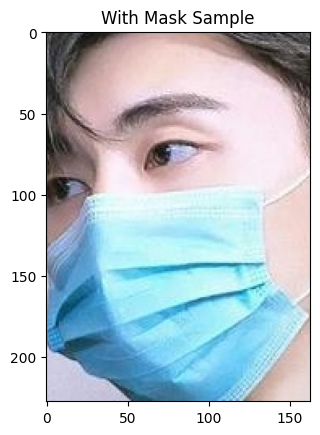

In [12]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.title("With Mask Sample")
plt.show()

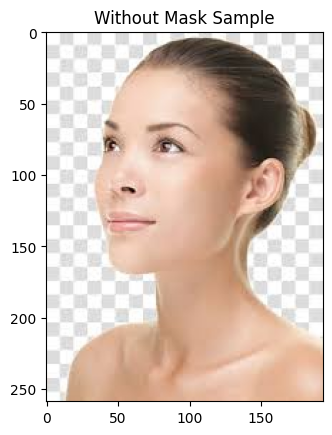

In [13]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.title("Without Mask Sample")
plt.show()

# **Image Processing**

In [14]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

array([[[123, 125, 112],
        [134, 134, 122],
        [134, 134, 122],
        ...,
        [ 78,  71,  63],
        [ 59,  58,  46],
        [ 40,  41,  34]],

       [[129, 131, 118],
        [140, 141, 128],
        [137, 137, 124],
        ...,
        [ 71,  64,  54],
        [ 50,  48,  36],
        [ 37,  39,  27]],

       [[140, 142, 127],
        [147, 149, 134],
        [139, 140, 126],
        ...,
        [ 70,  63,  52],
        [ 43,  42,  29],
        [ 32,  34,  21]],

       ...,

       [[107, 105, 100],
        [110, 105, 101],
        [110, 106, 101],
        ...,
        [108, 100,  93],
        [105,  97,  90],
        [103,  94,  87]],

       [[103, 102,  97],
        [104, 103,  98],
        [105, 104,  99],
        ...,
        [101,  94,  86],
        [ 98,  89,  82],
        [ 93,  84,  78]],

       [[104, 103,  98],
        [105, 104,  99],
        [106, 105, 100],
        ...,
        [ 92,  85,  78],
        [ 86,  80,  74],
        [ 80,  76,  73]]], dtype=uint8)
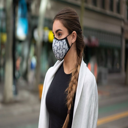

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[159, 190, 212],
        [148, 184, 209],
        [157, 190, 213],
        ...,
        [177, 218, 254],
        [175, 218, 255],
        [179, 222, 255]],

       [[148, 184, 210],
        [152, 186, 211],
        [165, 196, 221],
        ...,
        [177, 217, 254],
        [176, 218, 255],
        [180, 222, 255]],

       [[150, 186, 211],
        [157, 190, 216],
        [170, 200, 226],
        ...,
        [176, 216, 254],
        [176, 218, 255],
        [181, 222, 255]]], dtype=uint8)
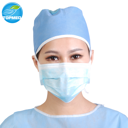

In [28]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.62352941, 0.74509804, 0.83137255],
        [0.58039216, 0.72156863, 0.81960784],
        [0.61568627, 0

# **Building a Convolutional Neural Networks (CNN)**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.6708 - loss: 0.8346 - val_accuracy: 0.8992 - val_loss: 0.3192
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8638 - loss: 0.3357 - val_accuracy: 0.8760 - val_loss: 0.3121
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8824 - loss: 0.2974 - val_accuracy: 0.9124 - val_loss: 0.2409
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9124 - loss: 0.2297 - val_accuracy: 0.9339 - val_loss: 0.1941
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9132 - loss: 0.2100 - val_accuracy: 0.9273 - val_loss: 0.2041
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9244 - loss: 0.1896 - val_accuracy: 0.9322 - val_loss: 0.1884
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9349 - loss: 0.1652 - val_accuracy: 0.9339 - val_loss: 0.1855
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9463 - loss: 0.1325 - val_acc

# **Model Evaluation**

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9127 - loss: 0.2803
Test Accuracy = 0.9179351329803467


In [35]:
# Save the model after training
model.save('face_mask_detection_model.h5')

In [36]:
# Save the model after training (using the native Keras format)
model.save('face_mask_detection_model.keras')

In [37]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,202,120 (84.69 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,801,414 (56.46 MB)

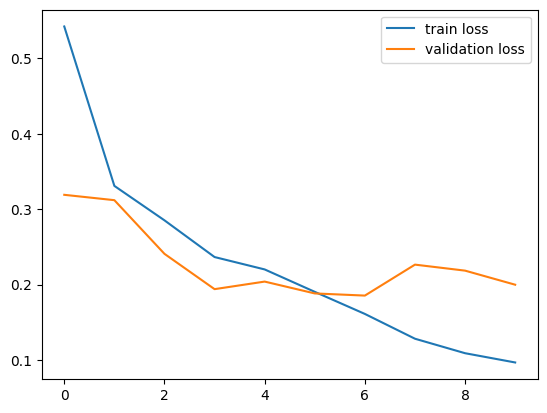

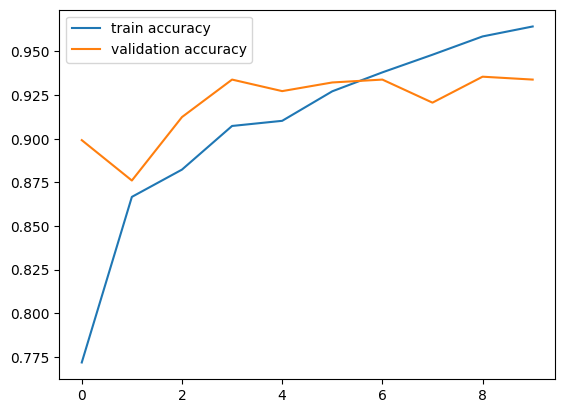

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# **Predictive System**

Path of the image to be predicted: /content/man_wearing_a_gas_mask_by_annukiller_dautmvc-fullview.jpg


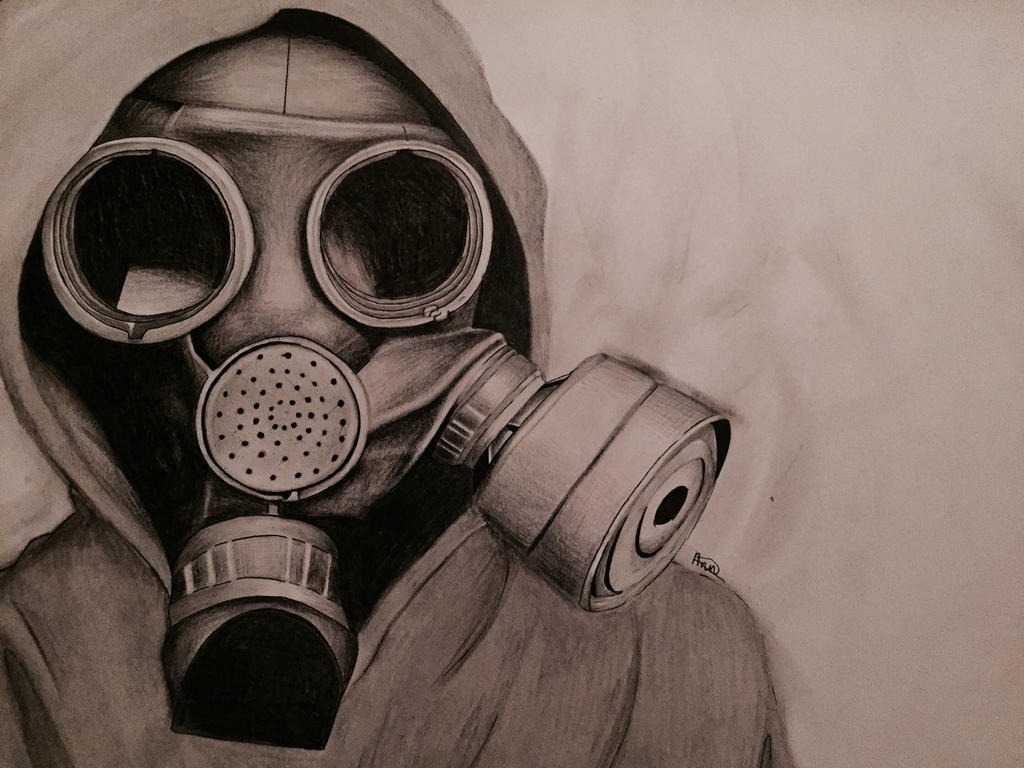

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.00329143 0.9967085 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Check if image loaded successfully
if input_image is None:
    print("Error: Could not load image, Please check the file path 'or' image provided is not a Human Image")
else:
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128,128))

    input_image_scaled = input_image_resized/255

    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)


    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)


    if input_pred_label == 1:

      print('The person in the image is wearing a mask')

    else:

      print('The person in the image is not wearing a mask')

# Data Augmentation and Transfer Learning

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 182ms/step - accuracy: 0.8918 - loss: 0.2533 - val_accuracy: 0.9689 - val_loss: 0.0738
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 132ms/step - accuracy: 0.9521 - loss: 0.1200 - val_accuracy: 0.9835 - val_loss: 0.0492
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.9717 - loss: 0.0883 - val_accuracy: 0.9848 - val_loss: 0.0419
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - accuracy: 0.9747 - loss: 0.0698 - val_accuracy: 0.9801 - val_loss: 0.0491
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9742 - loss: 0.0743 - val_accuracy: 0.9868 - val_loss: 0.0335
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9763 - loss: 0.0637 - val_accuracy: 0.9854 - val_loss: 0.0399
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.9797 - loss: 0.0601 - val_accuracy: 0.9894 - val_loss: 0.0328
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9786 - loss: 0.0740 - val

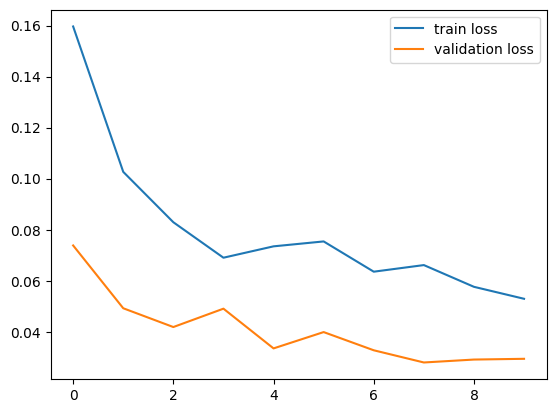

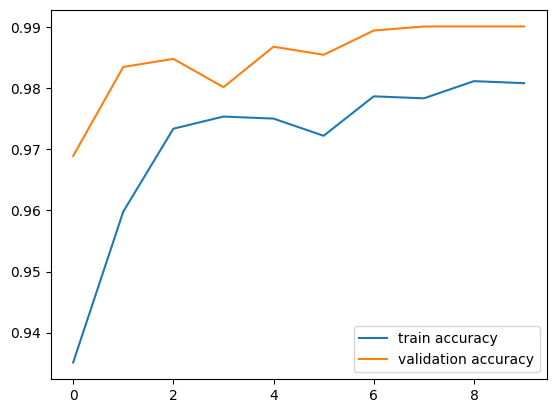

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Applying data augmentation to training data
train_generator = datagen.flow(X_train_scaled, Y_train, batch_size=32)

# Transfer Learning: Use MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_of_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using augmented data
history = model.fit(train_generator, validation_data=(X_test_scaled, Y_test), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


# Plotting loss and accuracy graphs
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


# Test on an Unseen Dataset

In [40]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [41]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-12k-images-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [43]:
WithMask_files = os.listdir('/content/Face Mask Dataset/Test/WithMask')
WithoutMask_files = os.listdir('/content/Face Mask Dataset/Test/WithoutMask')

In [44]:
print('Number of images with mask:', len(WithMask_files))
print('Number of images without mask:', len(WithoutMask_files))

Number of images with mask: 483
Number of images without mask: 509


In [45]:
# Load and preprocess the unseen dataset
unseen_data_path = '/content/Face Mask Dataset/Test'

# Assuming the unseen data is organized in 'with_mask' and 'without_mask' subdirectories
with_mask_files_unseen = os.listdir(unseen_data_path + '/WithMask')
without_mask_files_unseen = os.listdir(unseen_data_path + '/WithoutMask')

unseen_data = []
unseen_labels = []
# Preprocess with mask images
for img_file in with_mask_files_unseen:
    # Use os.path.join to construct the correct file path
    image_path = os.path.join(unseen_data_path, 'WithMask', img_file)
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    unseen_data.append(image)
    unseen_labels.append(1)  # 1 for 'with_mask'

# Preprocess without mask images
for img_file in without_mask_files_unseen:
    # Use os.path.join to construct the correct file path
    image_path = os.path.join(unseen_data_path, 'WithoutMask', img_file)
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    unseen_data.append(image)
    unseen_labels.append(0)  # 0 for 'without_mask'

# Convert to numpy arrays
X_unseen = np.array(unseen_data)
Y_unseen = np.array(unseen_labels)

# Normalize the unseen dataset
X_unseen_scaled = X_unseen / 255.0

# Evaluate the model on the unseen dataset
# Assuming 'model' is defined elsewhere
loss, accuracy = model.evaluate(X_unseen_scaled, Y_unseen)
print('Test Accuracy on Unseen Dataset:', accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8968 - loss: 0.3582
Test Accuracy on Unseen Dataset: 0.9375
